In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/data'
od.download(dataset_url)

In [1]:
import os

DATA_DIR = './data/walmart-recruiting-store-sales-forecasting'
print(os.listdir(DATA_DIR))

['features.csv', 'features.csv.zip', 'sampleSubmission.csv', 'sampleSubmission.csv.zip', 'stores.csv', 'submission.csv', 'test.csv', 'test.csv.zip', 'train.csv', 'train.csv.zip']


In [2]:
from zipfile import ZipFile

with ZipFile(DATA_DIR+'/features.csv.zip') as zpf:
    zpf.extractall(path=DATA_DIR)
with ZipFile(DATA_DIR+'/sampleSubmission.csv.zip') as zpf:
    zpf.extractall(path=DATA_DIR)
with ZipFile(DATA_DIR+'/test.csv.zip') as zpf:
    zpf.extractall(path=DATA_DIR)
with ZipFile(DATA_DIR+'/train.csv.zip') as zpf:
    zpf.extractall(path=DATA_DIR)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab
import seaborn as sns
%matplotlib inline

In [4]:
raw_df = pd.read_csv(DATA_DIR+'/train.csv')
test_df = pd.read_csv(DATA_DIR+'/test.csv')
submission_df = pd.read_csv(DATA_DIR+'/sampleSubmission.csv')
features_df = pd.read_csv(DATA_DIR+'/features.csv')
stores_df = pd.read_csv(DATA_DIR+'/stores.csv')

In [5]:
raw_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [6]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [7]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [8]:
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [9]:
submission_df

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


In [10]:
merged_df = raw_df.merge(stores_df, how='left', on='Store')
merged_test_df = test_df.merge(stores_df, how='left', on='Store')

In [11]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


In [12]:
merged_df = merged_df.merge(features_df, how='left', on=['Date','Store','IsHoliday'])
merged_test_df = merged_test_df.merge(features_df, how='left', on=['Date','Store','IsHoliday'])

In [13]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [14]:
merged_test_df

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [16]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [17]:
split_date(merged_df)
split_date(merged_test_df)

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [19]:
merged_df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,2010.968591,6.449510,15.673131,25.826762
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,0.796876,3.243217,8.753549,14.151887
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,2010.000000,1.000000,1.000000,1.0
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,2010.000000,4.000000,8.000000,14.0
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,2011.000000,6.000000,16.000000,26.0
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,2012.000000,9.000000,23.000000,38.0
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2012.000000,12.000000,31.000000,52.0


In [20]:
input_cols = merged_test_df.columns
target_col = 'Weekly_Sales'

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_df, val_df = train_test_split(merged_df, test_size=0.2)

In [23]:
train_inputs = train_df[input_cols]
val_inputs = val_df[input_cols]
test_inputs = merged_test_df[input_cols]

train_targets = train_df[target_col]
val_targets = val_df[target_col]

In [24]:
input_cols

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear'],
      dtype='object')

In [25]:
numeric_cols = ['Size', 'Fuel_Price', 'CPI', 'Unemployment']
categorical_cols = ['Store', 'Dept','IsHoliday','Type']

In [26]:
numeric_cols

['Size', 'Fuel_Price', 'CPI', 'Unemployment']

In [27]:
categorical_cols

['Store', 'Dept', 'IsHoliday', 'Type']

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [29]:
min_MarkDown1 = train_inputs.MarkDown1.min()
min_MarkDown2 = train_inputs.MarkDown2.min()
min_MarkDown3 = train_inputs.MarkDown3.min()
min_MarkDown4 = train_inputs.MarkDown4.min()
min_MarkDown5 = train_inputs.MarkDown5.min()
min_MarkDown1, min_MarkDown2, min_MarkDown3, min_MarkDown4, min_MarkDown5

(0.27, -265.76, -29.1, 0.22, 135.16)

In [30]:
scaler = MinMaxScaler()
imputer = SimpleImputer(fill_value=0)
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [31]:
scaler.fit(merged_df[numeric_cols])
imputer.fit(merged_df[numeric_cols])
encoder.fit(merged_df[categorical_cols])

c:\Users\rohan\anaconda3\envs\myenv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [32]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

C:\Users\rohan\AppData\Local\Temp\ipykernel_30404\1918363863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
C:\Users\rohan\AppData\Local\Temp\ipykernel_30404\1918363863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
C:\Users\rohan\AppData\Local\Temp\ipykernel_30404\1918363863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [33]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [34]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\rohan\AppData\Local\Temp\ipykernel_30404\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\rohan\AppData\Local\Temp\ipykernel_30404\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\rohan\AppData\Local\Temp\ipykernel_30404\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

In [35]:
X_train = train_inputs[numeric_cols+encoded_cols].copy()
X_val = val_inputs[numeric_cols+encoded_cols].copy()
X_test = test_inputs[numeric_cols+encoded_cols].copy()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train, train_targets)

LinearRegression()

In [39]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

In [40]:
train_error = mean_squared_error(train_preds, train_targets)
val_error = mean_squared_error(val_preds, val_targets)
np.sqrt(train_error), np.sqrt(val_error)

(13262.907113379444, 13442.817345612551)

In [66]:
lin_reg = LinearRegression()
rnd_reg = RandomForestRegressor(random_state=42, max_depth=60)
svm_reg = SVR(kernel='poly', gamma='auto', coef0=1, shrinking=False)
xgb_reg = XGBRegressor()

voting_reg = VotingRegressor(
    estimators=[('rf', rnd_reg)]
)

# ('lr', lin_reg), ('rf', rnd_reg), ('svc', svm_reg), ('xgb', xgb_reg)

In [63]:
def predict_errors(train_inputs, train_targets, val_inputs, val_targets, model= voting_reg):
    model.fit(train_inputs, train_targets)
    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)
    train_error = mean_squared_error(train_preds, train_targets)
    val_error = mean_squared_error(val_preds, val_targets)
    return np.sqrt(train_error), np.sqrt(val_error)

In [52]:
train_error, val_error = predict_errors(X_train, train_targets, X_val, val_targets, voting_reg)
train_error, val_error

(14515761.742407847, 39177142.206385225)

In [ ]:
def predict_plot(start_depth= 40, end_depth= 60):
    train_rmse = []
    val_rmse = []
    index = []
    for i in range(start_depth, end_depth+1):
        model = RandomForestRegressor(random_state=42, max_depth=i)
        train_error, val_error = predict_errors(X_train, train_targets, X_val, val_targets, model)
        train_rmse.append(train_error)
        val_rmse.append(val_error)
        index.append(i)    
    plt.plot(index, train_rmse, 'r-o')
    plt.plot(index, val_rmse, 'b--x')
    plt.legend('Train RMSE', 'Val RMSE')
    plt.xlabel("Max-Depth")
    plt.ylabel("RMSE")
    plt.grid()
    plt.show()
    return train_rmse, val_rmse, index

C:\Users\rohan\AppData\Local\Temp\ipykernel_30404\1806603440.py:13: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Train RMSE', 'Val RMSE')


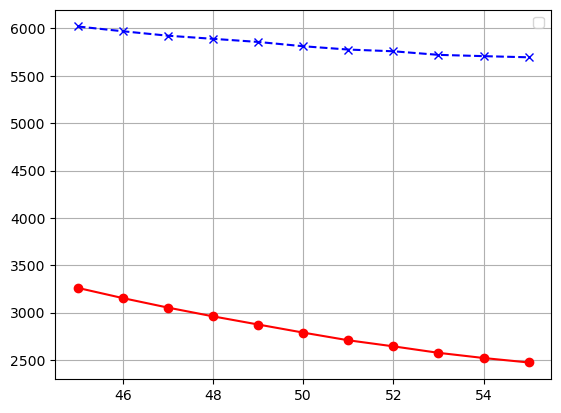

In [64]:
train_rmse, val_rmse, index = predict_plot(45, 55)

C:\Users\rohan\AppData\Local\Temp\ipykernel_30404\1806603440.py:13: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Train RMSE', 'Val RMSE')


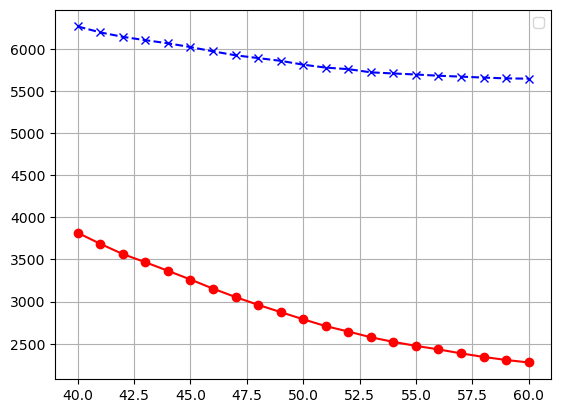

In [65]:
train_rmse, val_rmse, index = predict_plot()

In [ ]:
plt.plot(index, train_rmse, 'r-o')
plt.plot(index, val_rmse, 'b--x')
plt.legend('Train RMSE', 'Val RMSE')
plt.xlabel("Max-Depth")
plt.ylabel("RMSE")
plt.grid()
plt.show()

In [77]:
model = RandomForestRegressor(random_state=42, max_depth=60)

In [78]:
train_error, val_error = predict_errors(X_train, train_targets, X_val, val_targets, model)
train_error, val_error

(2276.9463073841766, 5645.863719659226)

In [83]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

In [84]:
train_score = accuracy_score(train_preds, train_targets)
val_score = accuracy_score(val_preds, val_targets)
train_score, val_score

ValueError: continuous is not supported

In [85]:
test_preds = model.predict(X_test)
submission_preds = test_preds
submission_preds

array([21249.6376    , 19133.0293    , 18762.8641    , ...,
        2006.26756698,  2006.26756698,  2006.26756698])

In [86]:
submission_df['Weekly_Sales'] = submission_preds
submission_df

,Id,Weekly_Sales
0,1_1_2012-11-02,21249.637600
1,1_1_2012-11-09,19133.029300
2,1_1_2012-11-16,18762.864100
3,1_1_2012-11-23,20868.035600
4,1_1_2012-11-30,19159.704800
...,...,...
115059,45_98_2013-06-28,2006.267567
115060,45_98_2013-07-05,2006.267567
115061,45_98_2013-07-12,2006.267567
115062,45_98_2013-07-19,2006.267567


In [87]:
submission_df.to_csv(DATA_DIR +'/submission.csv', index=None)
from IPython.display import FileLink
FileLink(DATA_DIR +'/submission.csv')

d:\Documents\AI-ML-DL-Data\Kaggle\data\walmart-recruiting-store-sales-forecasting\submission.csv